Cargar las librerías iniciales

In [22]:
# librerías generales
import pandas as pd
import numpy as np
import scikitplot as skplt # pip install scikitplot
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree

Cargar los datos del archivo

In [23]:
_raw = pd.read_csv('data/raw/bank-sem-aplicacion.csv')
bank_data = pd.DataFrame(_raw)
#bank_data.head()

# Esto no se si es necesario pero lo voy a dejar por acá
#bank_data.set_index('cod_cliente', inplace=FTr)
bank_data.head()


,cod_cliente,edad_cliente,margen_beneficio,sdo_financiacion,sdo_inversion,sdo_inversion_fuera_bal,sdo_inversion_no_T1,sdo_financiacion_no_T1,imp_domiciliaciones_cargo,imp_cuota_pres_hip,...,sdo_cta_vista,sdo_avales,sdo_pres_hipotecarios,sdo_pres_personales,sdo_valores,imp_movimientos_cargo,imp_movimientos_abono,num_movimientos_cargo,num_movimientos_abono,num_accesos_banca_elec
0,Client697,55,6.71,0.00,467.18,35.91,467.18,0.00,148.03,0.00,...,467.18,0.0,0.00,0.00,0.00,-178.00,1133.99,5,3,0
1,Client1166,52,9.74,52650.40,143.70,1916.97,143.70,52650.40,261.66,344.64,...,143.70,0.0,52580.40,0.00,0.00,-306.39,0.00,9,0,0
2,Client1457,53,7.64,0.00,11231.73,0.00,11231.73,0.00,129.54,0.00,...,11231.73,0.0,0.00,0.00,6791.56,-425.95,1894.41,5,4,0
3,Client1906,44,5.40,0.00,378.66,0.00,378.66,0.00,50.42,0.00,...,378.66,0.0,0.00,0.00,0.00,-3665.57,2932.90,16,8,0
4,Client2481,58,103.17,20939.99,1410.40,0.00,1410.40,20939.99,1545.23,431.79,...,1410.40,0.0,16472.95,3436.67,0.00,-842.20,654.00,16,6,4


In [24]:
# identificar clase objetivo y variables independientes
X = bank_data.loc[:, bank_data.columns != 'cod_cliente']  ## consultar mañana
y = bank_data['cod_cliente']

# partir en train y test
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# modelo de preprocesamiento obtenido desde el conjunto de entrenamiento
md_prepro = StandardScaler()
md_prepro.fit(X_train)

StandardScaler()

In [25]:
# escalamos conjunto entrenamiento
X_train_scaled = md_prepro.transform(X_train)

# visualizamos estadísticas
df_describe = pd.DataFrame(X_train_scaled)
df_describe.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,8.700000e+01,8.700000e+01,8.700000e+01,8.700000e+01,8.700000e+01,8.700000e+01,8.700000e+01,8.700000e+01,8.700000e+01,8.700000e+01,...,8.700000e+01,87.0,8.700000e+01,8.700000e+01,8.700000e+01,8.700000e+01,8.700000e+01,8.700000e+01,8.700000e+01,8.700000e+01
mean,-2.450147e-16,-1.355876e-18,8.932829e-17,1.148507e-17,2.424625e-17,9.188053e-17,8.932829e-17,7.401487e-17,1.020895e-17,-2.552237e-17,...,9.538985e-17,0.0,1.786566e-17,3.955967e-17,2.616043e-17,2.552237e-17,-1.020895e-17,1.020895e-17,-7.146263e-17,-4.849250e-17
std,1.005797e+00,1.005797e+00,1.005797e+00,1.005797e+00,1.005797e+00,1.005797e+00,1.005797e+00,1.005797e+00,1.005797e+00,1.005797e+00,...,1.005797e+00,0.0,1.005797e+00,1.005797e+00,1.005797e+00,1.005797e+00,1.005797e+00,1.005797e+00,1.005797e+00,1.005797e+00
min,-2.110967e+00,-2.888893e+00,-6.337098e-01,-3.991996e-01,-3.333767e-01,-3.994211e-01,-6.337098e-01,-8.943627e-01,-6.914877e-01,-6.183140e-01,...,-5.653604e-01,0.0,-5.956043e-01,-3.371949e-01,-1.765673e-01,-8.904577e+00,-2.942847e-01,-1.023908e+00,-1.202849e+00,-4.910536e-01
25%,-7.751208e-01,-2.783860e-01,-6.337098e-01,-3.754858e-01,-3.333767e-01,-3.757054e-01,-6.337098e-01,-7.927489e-01,-6.914877e-01,-6.183140e-01,...,-4.763031e-01,0.0,-5.956043e-01,-3.371949e-01,-1.765673e-01,1.875641e-02,-2.942847e-01,-6.675879e-01,-1.202849e+00,-4.910536e-01
50%,-3.298386e-02,1.136487e-02,-5.201536e-01,-3.232712e-01,-3.333767e-01,-3.234870e-01,-5.201536e-01,-2.836514e-01,-6.914877e-01,-6.183140e-01,...,-3.313355e-01,0.0,-5.956043e-01,-3.371949e-01,-1.765673e-01,2.042482e-01,-2.383260e-01,-3.112680e-01,-1.051442e-01,-4.910536e-01
75%,6.102015e-01,4.166553e-01,3.610607e-01,-1.387847e-01,-3.599496e-02,-1.389867e-01,3.610607e-01,3.813678e-01,5.307282e-01,3.146810e-01,...,2.123526e-02,0.0,3.962641e-01,-2.895958e-01,-1.765673e-01,2.951047e-01,5.692135e-02,3.122919e-01,6.266592e-01,1.332147e-01
max,2.440806e+00,3.269838e+00,4.972371e+00,6.928273e+00,7.384152e+00,6.928601e+00,4.972371e+00,3.299915e+00,4.734709e+00,3.388722e+00,...,4.760067e+00,0.0,5.003010e+00,5.886124e+00,7.686038e+00,3.352848e-01,8.970051e+00,4.320891e+00,3.919774e+00,6.620176e+00


# Arboles de Clasificación

### Ejemplo 1

In [26]:
#############################################
## Árbol de clasificación
#############################################



# construcción del modelo y entrenamiento
np.random.seed(123)
md_tree = DecisionTreeClassifier()
md_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
# predicción del conjunto de test
y_pred = md_tree.predict(X_test)

# dataframe con datos entrada y prediccion
o_pred = pd.concat([X_test,y_test],axis=1)
o_pred['class_pred']=y_pred
o_pred.head()

,edad_cliente,margen_beneficio,sdo_financiacion,sdo_inversion,sdo_inversion_fuera_bal,sdo_inversion_no_T1,sdo_financiacion_no_T1,imp_domiciliaciones_cargo,imp_cuota_pres_hip,imp_tarj_credito,...,sdo_pres_hipotecarios,sdo_pres_personales,sdo_valores,imp_movimientos_cargo,imp_movimientos_abono,num_movimientos_cargo,num_movimientos_abono,num_accesos_banca_elec,cod_cliente,class_pred
4,58,103.17,20939.99,1410.40,0.0,1410.40,20939.99,1545.23,431.79,439.97,...,16472.95,3436.67,0.0,-842.20,654.00,16,6,4,Client2481,Client12399
114,48,105.89,61884.14,259.26,0.0,259.26,61884.14,124.85,357.66,32.00,...,60071.97,0.00,0.0,-225.39,671.02,6,6,36,Client71160,Client36470
89,42,-27.87,75641.66,11034.55,0.0,11034.55,75641.66,1492.11,620.19,661.05,...,75535.33,0.00,0.0,-890.38,486.99,7,5,10,Client52317,Client72817
81,68,19.65,0.00,6475.99,0.0,6475.99,0.00,14.42,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0,0,0,Client47709,Client66033
42,41,141.74,2984.36,0.00,0.0,0.00,2984.36,176.85,0.00,80.70,...,0.00,0.00,0.0,-17457.61,18738.40,24,4,25,Client27227,Client28524


In [28]:
# matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Client11764       0.00      0.00      0.00       0.0
 Client12399       0.00      0.00      0.00       0.0
 Client13442       0.00      0.00      0.00       0.0
 Client14153       0.00      0.00      0.00       1.0
 Client14158       0.00      0.00      0.00       1.0
 Client15027       0.00      0.00      0.00       1.0
 Client15289       0.00      0.00      0.00       1.0
 Client17564       0.00      0.00      0.00       0.0
 Client17593       0.00      0.00      0.00       1.0
 Client17998       0.00      0.00      0.00       1.0
 Client18416       0.00      0.00      0.00       0.0
 Client18550       0.00      0.00      0.00       1.0
  Client1906       0.00      0.00      0.00       0.0
 Client23428       0.00      0.00      0.00       1.0
  Client2481       0.00      0.00      0.00       1.0
 Client25090       0.00      0.00      0.00       0.0
 Client27227       0.00      0.00      0.00       1.0
 Client28524       0.00    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

### Ejemplo 2

In [30]:
# obtención probabilidad de cada clase de la variable objetivo
y_test_proba_predict = md_tree.predict_proba(X_test)
y_test_proba_predict[:5,]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

ValueError: Found input variables with inconsistent numbers of samples: [1444, 3306]

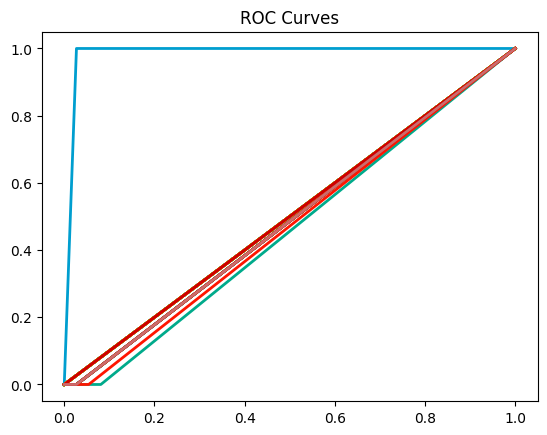

In [35]:
# Ensure dimensions of y_test and y_test_proba_predict are the same
y_test = y_test[:len(y_test_proba_predict)]
skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

##### Aquí estoy quedando